In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stopnje = (.16, .27, .34, .39, .5, 1)
meje1 = (0, 8021.34, 20400.00, 48000.00, 70907.20, np.inf)
meje = [[meje1[i], meje1[i+1], stopnje[i]] for i in range(len(stopnje)-1)]
for i, meja in enumerate(meje):
    sestevek = 0
    for j in range(i):
        sestevek += (meje[j][1] - meje[j][0]) * meje[j][2]
    meja.append(sestevek)

In [3]:
meje

[[0, 8021.34, 0.16, 0],
 [8021.34, 20400.0, 0.27, 1283.4144000000001],
 [20400.0, 48000.0, 0.34, 4625.6526],
 [48000.0, 70907.2, 0.39, 14009.652600000001],
 [70907.2, inf, 0.5, 22943.4606]]

In [4]:
olajsave = [[0, 11166.37, 6519.82],
           [11166.37, 12570.89, 4418.64],
           [12570.89, np.inf, 3302.70]]

In [5]:
def dohodnina(gross_value, social_contributions, tax_brackets, tax_breaks):
    gross_value = np.array(gross_value, dtype=np.float)
    gross_social = gross_value * (1 - social_contributions)

    # tax breaks only depend on the gross income
    for tax_break in tax_breaks:
        mask = (gross_value > tax_break[0]) & (gross_value <= tax_break[1])
        if type(mask) == np.bool_:
            if mask:
                gross_social -= tax_break[2]
        else:
            gross_social[mask] -= tax_break[2]

    # calculate the tax
    for bracket in tax_brackets:
        mask = (gross_social > bracket[0]) & (gross_social <= bracket[1])
        if type(mask) == np.bool_:
            if mask:
                gross_social = (gross_social - bracket[0]) * bracket[2] + bracket[3]
        else:
            gross_social[mask] = (gross_social[mask] - bracket[0]) * bracket[2] + bracket[3]

    if type(mask) == np.bool_:
        if gross_social < 0:
            gross_social = 0
    else:
        gross_social[gross_social < 0] = 0

    return gross_social


In [6]:
minimum_wage = 804.96
average_salary = 1621.46
monthly_salary = np.arange(0, average_salary*1.3, .01)
yearly_salary = monthly_salary * 12.

income_tax = dohodnina(yearly_salary, .221, meje, olajsave)
neto_salary = yearly_salary * (1 - .221) - income_tax

/Users/Miha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


93053
104757


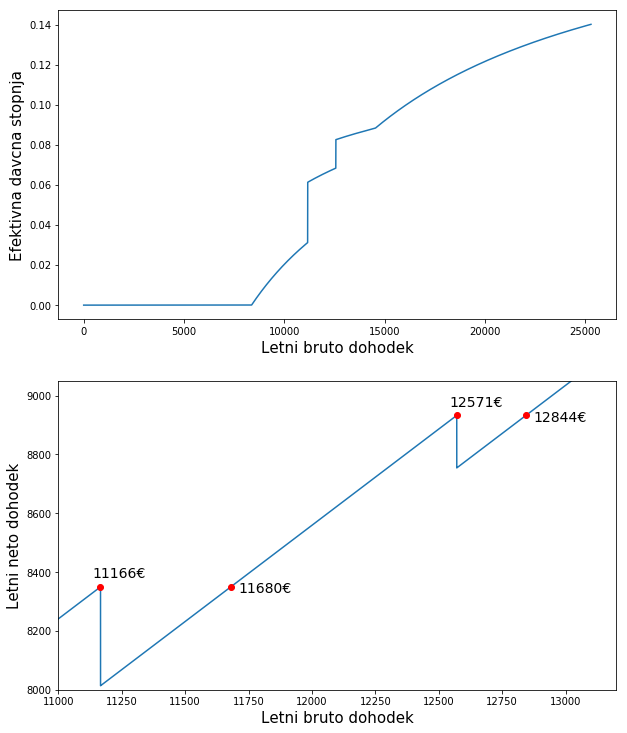

In [7]:
f, ax = plt.subplots(2, figsize=(10, 2 * 10 / 1.6))
ax[0].plot(yearly_salary, income_tax / yearly_salary)
ax[0].set_xlabel('Letni bruto dohodek', fontsize=15)
ax[0].set_ylabel('Efektivna davcna stopnja', fontsize=15)
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)

ax[1].plot(yearly_salary, neto_salary)
ax[1].set_xlabel('Letni bruto dohodek', fontsize=15)
ax[1].set_ylabel('Letni neto dohodek', fontsize=15)
xlim = (11000, 13200)
ylim = (8e3, 9050)
ax[1].set_xlim(xlim)
ax[1].set_ylim(ylim)

border = np.diff(neto_salary)
mask = border < 0
for item in np.where(border < 0)[0]:
    print(item)
    idx = np.argwhere(np.isclose(neto_salary, neto_salary[item]))
    idx_1 = idx[0]
    idx_2 = idx[-1]
    ax[1].plot(yearly_salary[idx_1], neto_salary[idx_1], 'o', c='r')
    ax[1].plot(yearly_salary[idx_2], neto_salary[idx_2], 'o', c='r')
    temp_float = float(yearly_salary[idx_1])
    ax[1].text(yearly_salary[idx_1] - 30, neto_salary[idx_1] + 30, '{:.0f}€'.format(temp_float),
              fontsize=14)
    temp_float = float(yearly_salary[idx_2])
    ax[1].text(yearly_salary[idx_2] + 30, neto_salary[idx_2] - 20, '{:.0f}€'.format(temp_float),
              fontsize=14)
